# Import packages

In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the data

In [2]:
with zipfile.ZipFile("../data/playground-series-s4e7.zip") as z:
    with z.open("sample_submission.csv") as f:
        sample_submission = pd.read_csv(f)
    with z.open("test.csv") as f:
        test = pd.read_csv(f)
    with z.open("train.csv") as f:
        train = pd.read_csv(f)

# Explore the data

In [4]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   id                    11504798 non-null  int64  
 1   Gender                11504798 non-null  object 
 2   Age                   11504798 non-null  int64  
 3   Driving_License       11504798 non-null  int64  
 4   Region_Code           11504798 non-null  float64
 5   Previously_Insured    11504798 non-null  int64  
 6   Vehicle_Age           11504798 non-null  object 
 7   Vehicle_Damage        11504798 non-null  object 
 8   Annual_Premium        11504798 non-null  float64
 9   Policy_Sales_Channel  11504798 non-null  float64
 10  Vintage               11504798 non-null  int64  
 11  Response              11504798 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [6]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   id        int64  
 1   Response  float64
dtypes: float64(1), int64(1)
memory usage: 117.0 MB


In [7]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
Gender,Male,Male,Female,Female,Female
Age,21,43,25,35,36
Driving_License,1,1,1,1,1
Region_Code,35.0,28.0,14.0,1.0,15.0
Previously_Insured,0,0,1,0,1
Vehicle_Age,1-2 Year,> 2 Years,< 1 Year,1-2 Year,1-2 Year
Vehicle_Damage,Yes,Yes,No,Yes,No
Annual_Premium,65101.0,58911.0,38043.0,2630.0,31951.0
Policy_Sales_Channel,124.0,26.0,152.0,156.0,152.0


In [9]:
train.describe(include="all")

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,11504798,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,6228134,NaN,NaN,NaN,NaN,5982678,5783229,NaN,NaN,NaN,NaN
mean,5.752398e+06,NaN,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,NaN,NaN,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,NaN,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,NaN,NaN,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,NaN,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,NaN,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,NaN,NaN,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,NaN,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,NaN,NaN,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,NaN,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,NaN,NaN,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00


In [157]:
categorical_variables = [
    "Gender",
    "Vehicle_Age",
    "Vehicle_Damage",
    "Driving_License",
    "Previously_Insured",
]

numerical_variables = [
    col
    for col in list(train.columns)
    if col not in categorical_variables + ["Response", "id"]
]

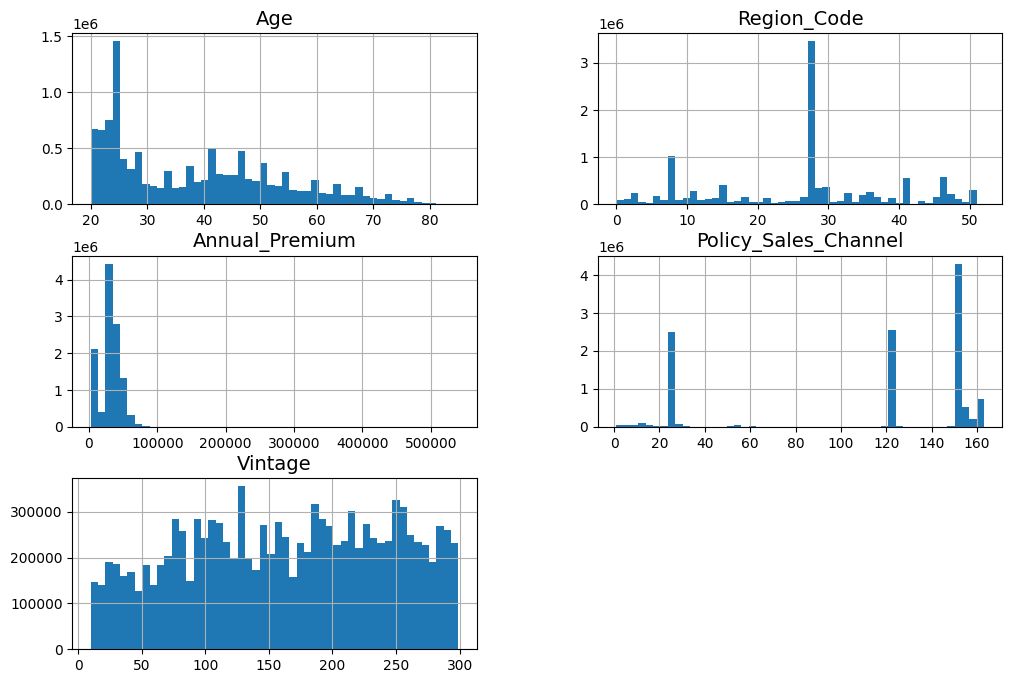

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train[numerical_variables].hist(bins=50, figsize=(12, 8))
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

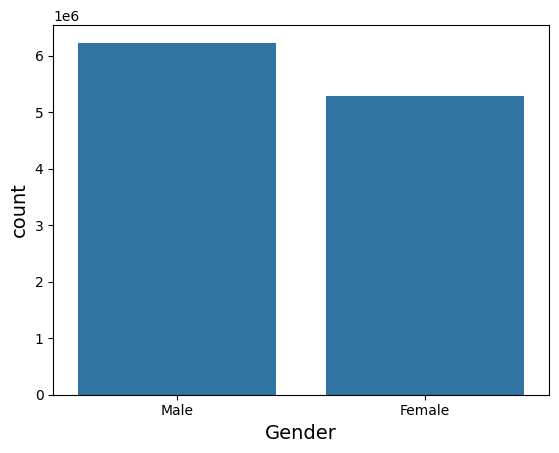

In [16]:
sns.countplot(train[categorical_variables], x= categorical_variables[0])

Gender variable could be useful

<Axes: xlabel='Vehicle_Age', ylabel='count'>

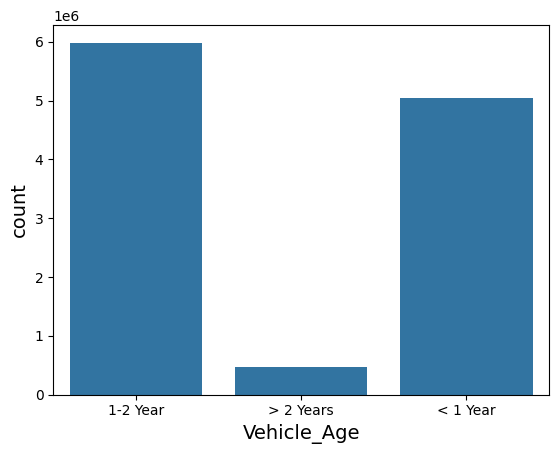

In [17]:
sns.countplot(train[categorical_variables], x= categorical_variables[1])

Vehicle_Age variable could be useful

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

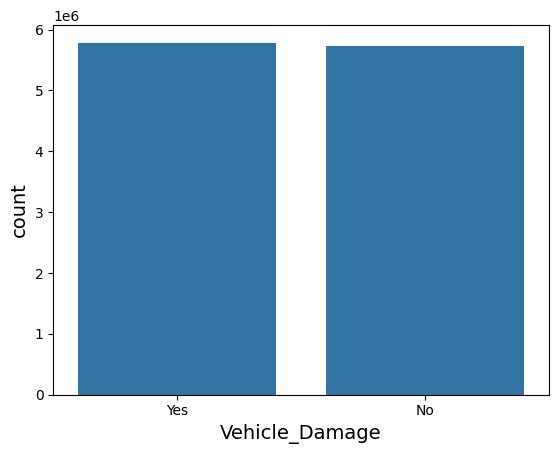

In [18]:
sns.countplot(train[categorical_variables], x= categorical_variables[2])

Vehicle_Damage could be useful

<Axes: xlabel='Driving_License', ylabel='count'>

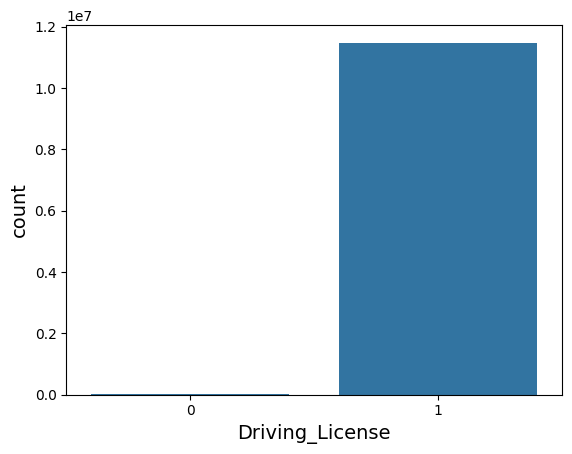

In [19]:
sns.countplot(train[categorical_variables], x= categorical_variables[3])

Driving License does not look useful

<Axes: xlabel='Previously_Insured', ylabel='count'>

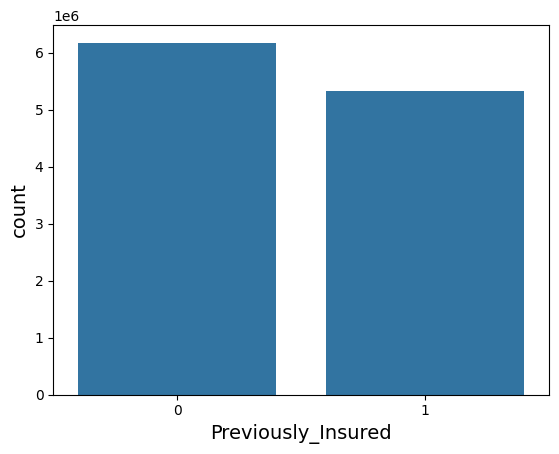

In [20]:
sns.countplot(train[categorical_variables], x= categorical_variables[4])

<Axes: xlabel='Response', ylabel='count'>

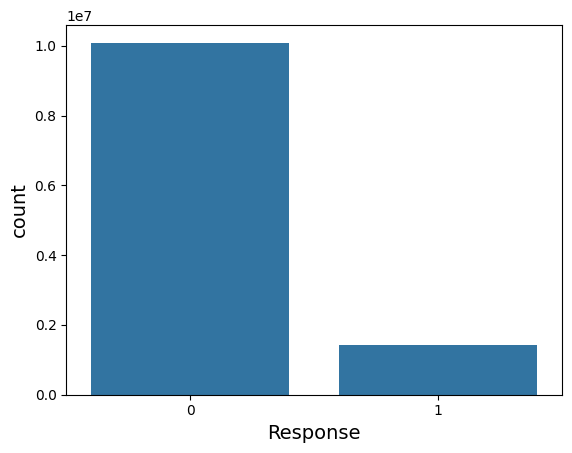

In [21]:
sns.countplot(train[["Response"]], x= "Response")

[Text(0, 0, '0.88'), Text(0, 0, '0.12')]

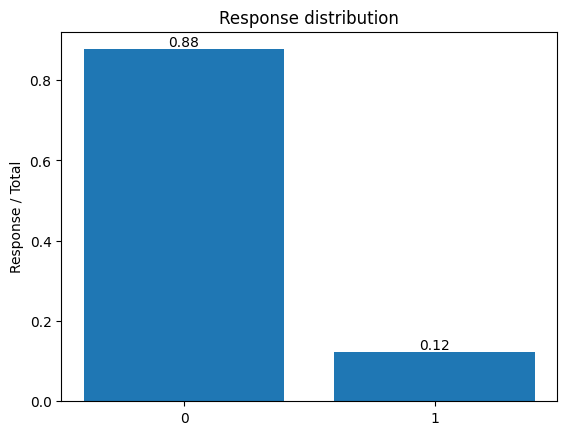

In [30]:
points = train["Response"].value_counts(normalize=True)

x_variables = points.index.values.astype("str")

y_variables = points.values

fig, ax = plt.subplots()

bar_container = ax.bar(x_variables, y_variables)

ax.set(ylabel='Response / Total', title='Response distribution')
ax.bar_label(bar_container, fmt='{:,.2f}')

In the dataset we have almost 90% of zero instances

## Split the data

In [31]:
train_train, train_test = train_test_split(train, test_size=0.2, random_state=42)

In [32]:
train_train["Response"].value_counts(normalize=True)

Response
0    0.877021
1    0.122979
Name: proportion, dtype: float64

In [33]:
train_test["Response"].value_counts(normalize=True)

Response
0    0.876928
1    0.123072
Name: proportion, dtype: float64

The distribution in train set and test set in Response is preserved

## Analysis for categorical variables

In [181]:
def count_to_graph(x,y,data):

    x_values = data[x].unique()

    categories = data[y].unique()

    values = {}
    for categorie_ith in categories:
        values[categorie_ith] = data[data[y]==categorie_ith].sort_values(x,ascending=True)["%_response"].values

    return x_values,values

    

In [182]:
def calculate_count(x,y,data):
    df = data.groupby(x,as_index=False)["id"].count().rename({"id":"total"},axis=1)
    df = data.groupby([x,y],as_index=False)["id"].count().merge(df,on=x,how="left")
    df["%_response"] = df["id"]/df["total"]
    return df

In [183]:
df = calculate_count("Gender","Response",train_train)

In [184]:
x_values, values = count_to_graph("Gender","Response",df)

In [190]:
def create_graph(x_col,y_col,data):
    df = calculate_count(x_col,y_col,data)
    x_values, values = count_to_graph(x_col,y_col,df)

    x = np.arange(len(x_values))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')


    for attribute, measurement in values.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'% {y_col} / 100')
    ax.set_title(f'Client {y_col} percentage count by {x_col}')
    ax.set_xticks(x + width/2, x_values)
    ax.legend(title=y_col,loc='upper center', ncols=2)

    #ax.set_ylim(0, 250)

    plt.show()
    

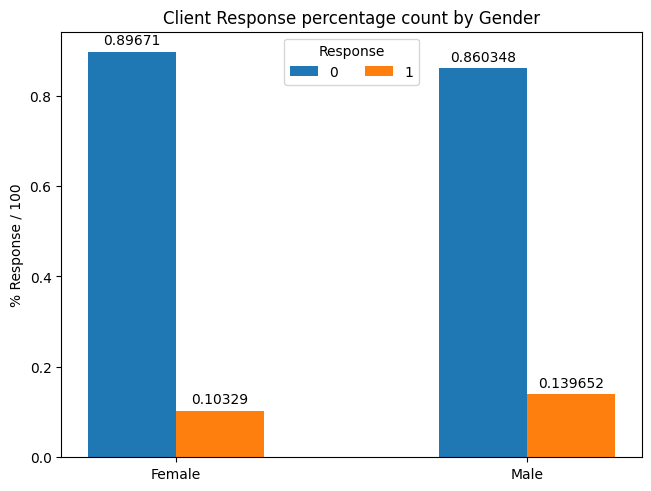

In [191]:
create_graph("Gender","Response",train_train)

In [192]:
categorical_variables

['Gender',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured']

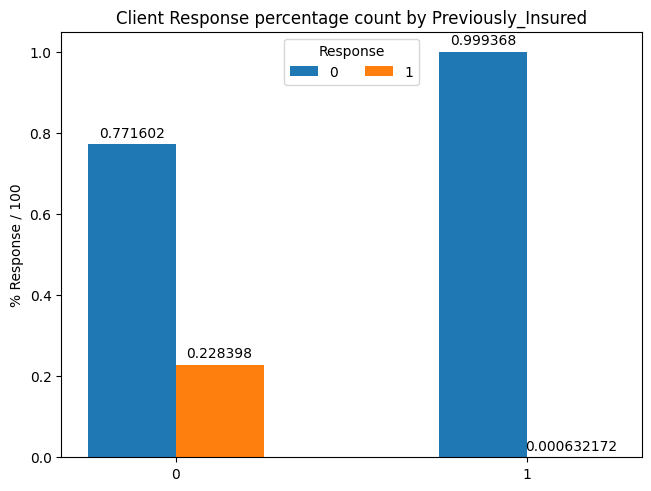

In [193]:
create_graph("Previously_Insured","Response",train_train)

In [194]:
calculate_count("Previously_Insured","Response",train_train)

,Previously_Insured,Response,id,total,%_response
0,0,0,3814738,4943920,0.771602
1,0,1,1129182,4943920,0.228398
2,1,0,4257225,4259918,0.999368
3,1,1,2693,4259918,0.000632


In [195]:
calculate_count("Vehicle_Damage","Response",train_train)

,Vehicle_Damage,Response,id,total,%_response
0,No,0,4557190,4576289,0.995827
1,No,1,19099,4576289,0.004173
2,Yes,0,3514773,4627549,0.759532
3,Yes,1,1112776,4627549,0.240468


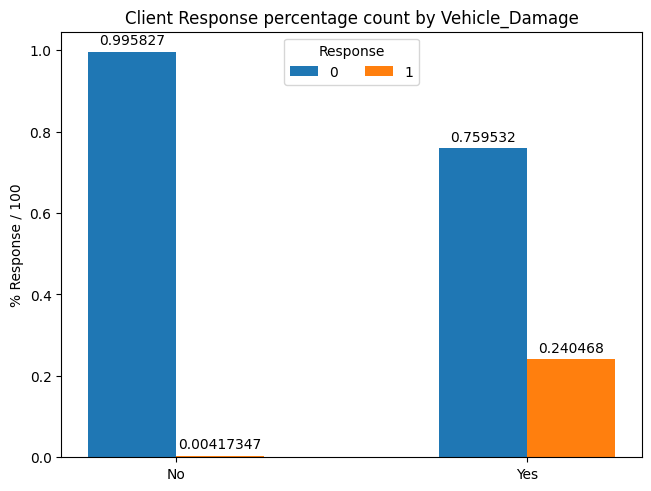

In [196]:
create_graph("Vehicle_Damage","Response",train_train)

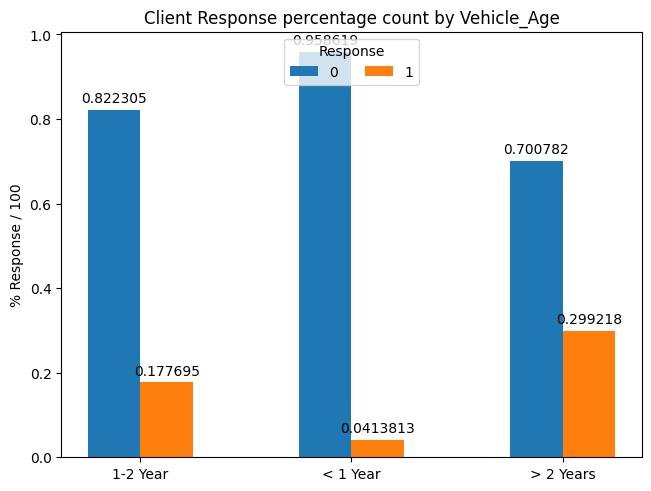

In [197]:
create_graph("Vehicle_Age","Response",train_train)

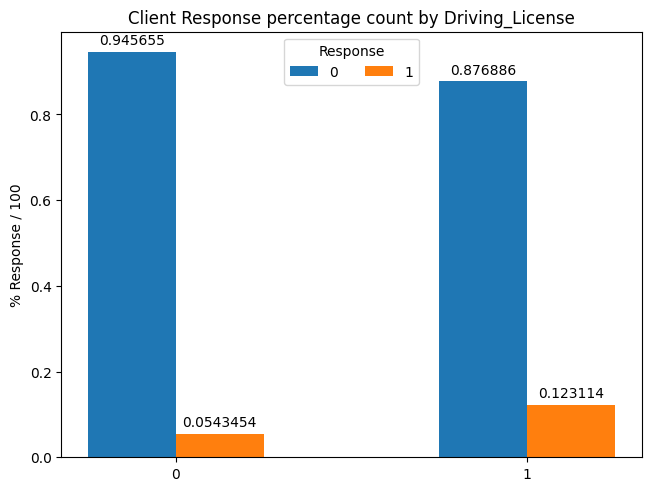

In [198]:
create_graph("Driving_License","Response",train_train)